# Student Analsis


In this notebook I present to you data taken out of a real highschool. In this dataset we have a total of 16 variables and a single class. Most of the data is categorical, this means it is divided into a certain ammount of pre-defined categories. There also a few columns that have numerical data in the form of integers. In this notebook we will try to extract some key features in order to better understand the dataset and as part of the field of 'Data Analysis'.

## Step 0: 
### Load the data into a pandas dataframe

How do you intend to do data analysis without loading the data????
# ?

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
df=pd.read_csv("xAPI-Edu-Data.csv")
df


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


## Step 1: 
### Print some elements from the dataset in order to take a quick look at the dataset

Understanding the data you are working with is very important

In [5]:
# Print 10 e random elements from the dataset.
df.sample(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
15,F,KW,KuwaIT,MiddleSchool,G-06,A,IT,F,Father,30,40,22,66,Yes,Good,Under-7,M
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
178,F,lebanon,lebanon,lowerlevel,G-02,B,French,S,Mum,80,42,33,13,Yes,Bad,Under-7,H
396,M,Jordan,Jordan,MiddleSchool,G-07,A,Biology,F,Father,80,80,46,61,Yes,Bad,Under-7,M
294,M,Iraq,Iraq,lowerlevel,G-04,A,Science,F,Father,90,86,82,74,Yes,Good,Above-7,M
80,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,8,15,10,40,Yes,Bad,Under-7,L
340,F,Iraq,Iraq,lowerlevel,G-02,B,French,F,Father,16,90,15,11,No,Good,Under-7,M
331,M,Jordan,Jordan,lowerlevel,G-02,A,French,S,Father,35,2,29,33,No,Good,Above-7,L
188,M,KW,KuwaIT,MiddleSchool,G-08,A,Arabic,S,Mum,75,71,72,53,Yes,Good,Under-7,H
46,M,KW,KuwaIT,lowerlevel,G-05,A,English,F,Father,7,10,1,30,No,Bad,Above-7,L


## Step 2:
### Check for missing or null values

We should always check for missing values as part of getting familiarized with our data.


In [81]:
# check for null values
df.isnull().sum()
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

## Step 3:
### which is the column with the highest ammount of VARIABILITY?

Time to start extracting info.


In [90]:
# Check every column EXCEPT the one for the class and find out which one has the highest variability
import seaborn as sns
sigma = 0
columns_list=[]
for col in df.columns:
    columns_list.append(col)
columns_list.sort()
columns_list

['AnnouncementsView',
 'Class',
 'Discussion',
 'GradeID',
 'NationalITy',
 'ParentAnsweringSurvey',
 'ParentschoolSatisfaction',
 'PlaceofBirth',
 'Relation',
 'SectionID',
 'Semester',
 'StageID',
 'StudentAbsenceDays',
 'Topic',
 'VisITedResources',
 'gender',
 'raisedhands']

<ipython-input-75-74d3d031217a>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(df.PlaceofBirth.unique(),rotation=90)


[Text(0, 0, 'KuwaIT'),
 Text(1, 0, 'lebanon'),
 Text(2, 0, 'Egypt'),
 Text(3, 0, 'SaudiArabia'),
 Text(4, 0, 'USA'),
 Text(5, 0, 'Jordan'),
 Text(6, 0, 'venzuela'),
 Text(7, 0, 'Iran'),
 Text(8, 0, 'Tunis'),
 Text(9, 0, 'Morocco'),
 Text(10, 0, 'Syria'),
 Text(11, 0, 'Iraq'),
 Text(12, 0, 'Palestine'),
 Text(13, 0, 'Lybia')]

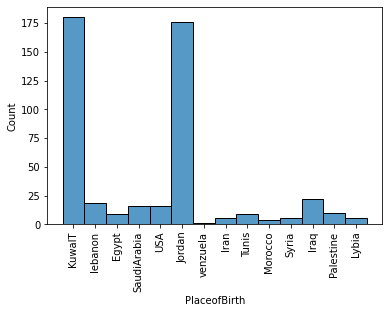

In [75]:
b=sns.histplot(df.PlaceofBirth)
b.set_xticklabels(df.PlaceofBirth.unique(),rotation=90)

## Step 4:
### Find out for each variable their skewness and plot 5 of them.

Understanding the biases of data can always give us some key information


In [95]:
# Select 5 columns and find out their bias
df.skew()



raisedhands          0.026962
VisITedResources    -0.342441
AnnouncementsView    0.399243
Discussion           0.362594
dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VisITedResources', ylabel='Density'>

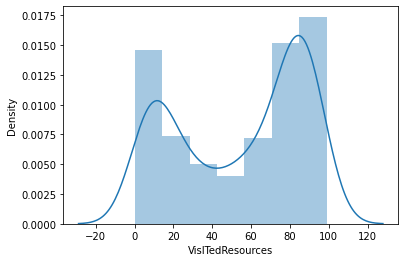

In [98]:
sns.distplot(df.VisITedResources)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='raisedhands', ylabel='Density'>

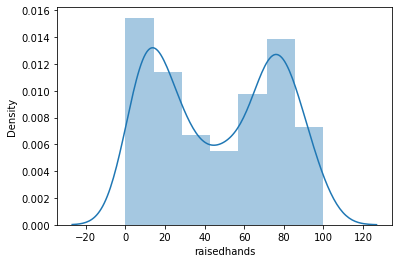

In [99]:
sns.distplot(df.raisedhands)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AnnouncementsView', ylabel='Density'>

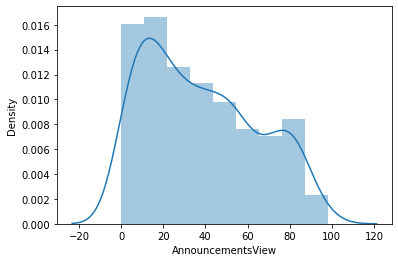

In [100]:
sns.distplot(df.AnnouncementsView)

## Step 5:
### Find out for all the variables which is their correlation with the class

Sometimes we need to reduce the ammount of features we feed the model in order to make it more lighweight, so we either select the best ones or take out the most useless ones.

In [105]:
# Select the top 4 most correlated and put them in a different dataset
df2=[]
df2.append(df.AnnouncementsView)
df2

[0       2
 1       3
 2       0
 3       5
 4      12
        ..
 475     5
 476    14
 477    25
 478    14
 479    23
 Name: AnnouncementsView, Length: 480, dtype: int64]

In [ ]:
# Select the top 4 least correlated and create a new dataset without them

## Step 6:
### Visualize the correlation between the previously selected 4 most correlated variables with the class

Lets see if those are correlated too.


In [ ]:
# Plot the correlation among themself for the previous 4 variables.

## Step 7:
### For the previoys 4 variables plot them AGAINST the class


In [3]:
# make 4 plot where you plot each of the variables with the class

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as L

In [ ]:
# compute the probability

## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as m or higher, using the previous calculation

In [ ]:
# Looking at step seven extrapolate from it the probability of a student being classified as M or H

## Step 9:
### Probability time, knowing a student was classified as H, what is the probability of him having raised the hand more than 10 times

In [ ]:
# Bayes time

## Step 10:
### Free time, if I was the principal of the school what plots and probabilities would you show me to help me accept only M and H students.